In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

     |████████████████████████████████| 14.8 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 16.9 MB/s eta 0:00:01    |█████████████▊                  | 11.8 MB 9.3 MB/s eta 0:00:02
     |████████████████████████████████| 9.9 MB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 41.8 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=603537b8053a7f484b7b1577662ab225463fe3636286d9b9affae3065b32cb59
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f

# Classification using sklearn
Scikit-learn (sklearn) is a Python library dedicated to machine learning. It contains classifier and regression algorithm objects which implement an API for training and predicting models. Additionally, it contains some methods for data manipulation and performance metric measuring of predictrive models.

### Quick example - Iris dataset

In [2]:
iris = sns.load_dataset('iris') #seaborn has some built in datasets
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


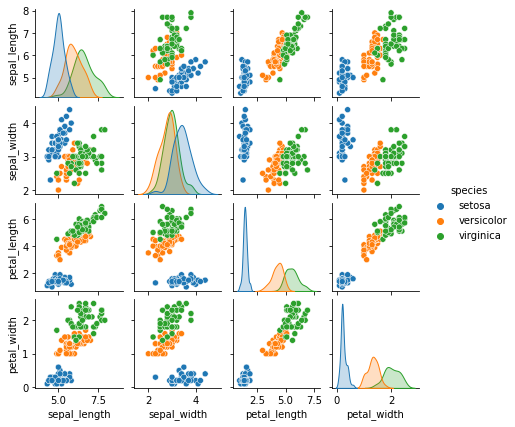

In [4]:
sns.pairplot(iris, hue='species', height=1.5);

##### Splitting the data set into feature vector X and target variable y

In [5]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


##### Splitting the data set into training and test sets. By default, test set size is 25% of data set.

In [8]:
#from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

##### Training and predicting using Naive Bayes classifier

In [17]:
#from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
predicted

,index,sepal_length,sepal_width,petal_length,petal_width,index,species,prediction
0,14,5.8,4.0,1.2,0.2,14,setosa,setosa
1,98,5.1,2.5,3.0,1.1,98,versicolor,versicolor
2,75,6.6,3.0,4.4,1.4,75,versicolor,versicolor
3,16,5.4,3.9,1.3,0.4,16,setosa,setosa
4,131,7.9,3.8,6.4,2.0,131,virginica,virginica
5,56,6.3,3.3,4.7,1.6,56,versicolor,versicolor
6,141,6.9,3.1,5.1,2.3,141,virginica,virginica
7,44,5.1,3.8,1.9,0.4,44,setosa,setosa
8,29,4.7,3.2,1.6,0.2,29,setosa,setosa
9,120,6.9,3.2,5.7,2.3,120,virginica,virginica


##### Calculate the accuracy as an average of accuracy per class

In [19]:
#from sklearn import metrics
metrics.accuracy_score(ytest, y_model)

0.9736842105263158

###### What happens if we select less columns?

In [22]:
X_iris = iris.drop(['species','petal_length','petal_width'], axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

(150, 2)
(150,)
0.8157894736842105


,index,sepal_length,sepal_width,index,species,prediction
0,14,5.8,4.0,14,setosa,setosa
1,98,5.1,2.5,98,versicolor,versicolor
2,75,6.6,3.0,75,versicolor,virginica
3,16,5.4,3.9,16,setosa,setosa
4,131,7.9,3.8,131,virginica,virginica
5,56,6.3,3.3,56,versicolor,virginica
6,141,6.9,3.1,141,virginica,virginica
7,44,5.1,3.8,44,setosa,setosa
8,29,4.7,3.2,29,setosa,setosa
9,120,6.9,3.2,120,virginica,virginica


In [23]:
X_iris = iris.drop(['species','sepal_length','sepal_width'], axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted

(150, 2)
(150,)
0.9736842105263158


,index,petal_length,petal_width,index,species,prediction
0,14,1.2,0.2,14,setosa,setosa
1,98,3.0,1.1,98,versicolor,versicolor
2,75,4.4,1.4,75,versicolor,versicolor
3,16,1.3,0.4,16,setosa,setosa
4,131,6.4,2.0,131,virginica,virginica
5,56,4.7,1.6,56,versicolor,versicolor
6,141,5.1,2.3,141,virginica,virginica
7,44,1.9,0.4,44,setosa,setosa
8,29,1.6,0.2,29,setosa,setosa
9,120,5.7,2.3,120,virginica,virginica


In [27]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier()

    # Train Classifer
    clf = clf.fit(X_train, y_train)

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    plt.show()

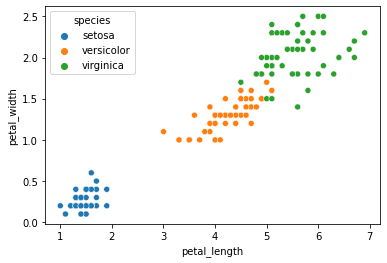

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



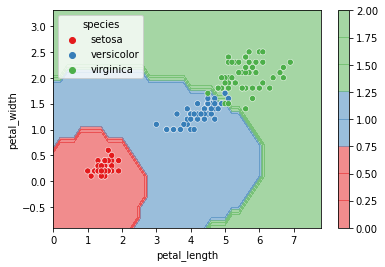

In [30]:
bayes_plot(pd.concat([X_iris,y_iris],axis=1),spread=1)